In [10]:
import ipywidgets as widgets
import os
from resipy import Project
k = Project(typ='R2')

os.getcwd()

Working directory is: C:\Users\Benjamin\Anaconda3\lib\site-packages\resipy
clearing dirname


'C:\\Users\\Benjamin\\Documents\\Z_Database\\geometadp\\test_ERT_TL'

C:/Users/Benjamin/Documents/Z_Database/geometadp/test_ERT_TL/dc-2d-timelapse/data/
3/3 imported


C:\Users\Benjamin\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,El-array,a,b,m,n,Rho,dev,ip,sp,...,resist,resError,phaseError,K,app,irecip,reciprocalErrRel,recipError,recipMean,reci_IP_err
0,NaN,Mixed / non conventional,1,3,4,6,40.60,0.0,0.0,23.6,...,-13.783651,NaN,NaN,-2.945243,40.596204,1,0.005732,0.079235,-13.823269,0.0
1,NaN,Mixed / non conventional,1,3,6,8,43.61,0.0,0.0,-13.0,...,-2.115049,NaN,NaN,-20.616702,43.605343,2,0.012099,0.025745,-2.127922,0.0
2,NaN,Mixed / non conventional,1,3,8,10,48.63,0.0,0.0,53.6,...,-0.786215,NaN,NaN,-61.850105,48.627461,3,0.004625,0.003645,-0.788037,0.0
3,NaN,Mixed / non conventional,1,3,10,12,46.27,0.0,0.0,-90.9,...,-0.340028,NaN,NaN,-136.070232,46.267723,4,0.004351,0.001483,-0.340770,0.0
4,NaN,Mixed / non conventional,1,3,12,14,49.76,0.0,0.0,35.5,...,-0.196928,NaN,NaN,-252.701859,49.764063,5,0.005183,0.001023,-0.197440,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,NaN,Mixed / non conventional,22,24,10,12,51.99,0.0,0.0,-84.9,...,-0.157596,NaN,NaN,-329.867229,51.985705,-119,0.000125,0.000020,-0.157586,0.0
340,NaN,Mixed / non conventional,22,24,12,14,58.49,0.0,0.0,321.1,...,-0.310280,NaN,NaN,-188.495559,58.486318,-138,-0.005150,-0.001602,-0.311081,0.0
341,NaN,Mixed / non conventional,22,24,14,16,53.65,0.0,0.0,-81.2,...,-0.569185,NaN,NaN,-94.247780,53.644451,-153,0.003279,0.001863,-0.568254,0.0
342,NaN,Mixed / non conventional,22,24,16,18,50.02,0.2,0.0,-242.3,...,-1.326633,NaN,NaN,-37.699112,50.012892,-164,-0.010090,-0.013453,-1.333360,0.0


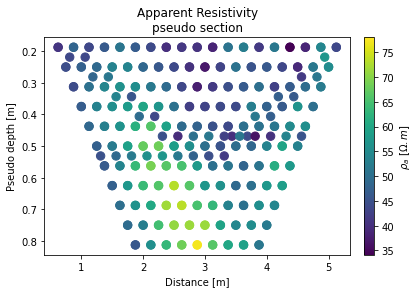

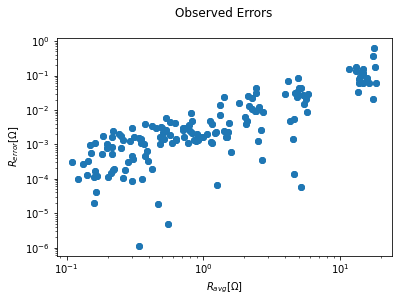

In [37]:
testdir = 'C:/Users/Benjamin/Documents/Z_Database/geometadp/test_ERT_TL/dc-2d-timelapse/'
print(testdir + 'data/')
k.createTimeLapseSurvey(testdir + 'data/')

k.showPseudo(index=0)
k.showError(index=0)

k.surveys[0].df

In [59]:
import ipywidgets as widgets 
from IPython.display import display, clear_output


slider = widgets.IntSlider(description='time', min=0, max=3)

out = widgets.Output()

sel_yy = widgets.SelectMultiple(
    options=list(k.surveys[0].df.select_dtypes('number').columns),
    #rows=10,
    description='x',
    disabled=False
)

import hvplot.xarray

def onchange(change):
    with out:
        clear_output()
        ds = k.surveys[change.new].df.to_xarray()
        #display(ds.app.hvplot())
        display(ds.hvplot(groupby='a'))
        
        #display(ds.air.interactive(time=pnw.DiscreteSlider).isel(time=time).plot())
        #display(k.showPseudo(index=change.new))

plottab = widgets.VBox([widgets.HBox([slider]),out])

slider.observe(onchange,'value')

display(plottab) 

In [54]:
import xarray as xr
import hvplot.xarray

ds = xr.tutorial.open_dataset("air_temperature.nc").rename({"air": "Tair"})
ds.Tair.hvplot()

ds2 = k.surveys[0].df.to_xarray()
ds2.app.hvplot()


C:\Users\Benjamin\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


:Curve   [index]   (app)